Welcome to our analysis of the top 250 IMDb movies of all time. The IMDB website is one of the most popular sources of information for movies and TV Shows. The top 250 list represents the most highly-rated films by the website's users. In this analysis, we will explore the trends and patterns . By the end of this analysis, we hope to gain a deeper understanding of what makes a movie truly great.

### **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### **LOADING DATASET**

In [2]:
df = pd.read_csv("/kaggle/input/imdb-top-250-movies/movies.csv")

### **INSPECTING THE DATASET**

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0144710,nm0000...","Marlon Brando,Al Pacino,James Caan,Richard S. ...",nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,"1,285,350",9.0,R,3h 22m,"Crime,Drama","nm0000199,nm0000380,nm0000473,nm0000134,nm0001...","Al Pacino,Robert Duvall,Diane Keaton,Robert De...",nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,"800,954",9.0,Approved,1h 36m,"Crime,Drama","nm0000842,nm0275835,nm0002011,nm0550855,nm0001...","Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Ma...",nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


In [4]:
df.shape

(250, 22)

In [5]:
df.describe()

,rank,year,imbd_rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.306800
std,72.312977,25.125356,0.229006
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

### **DROPPING THE COLUMNS WHICH WE WILL BE NOT USING**

In [7]:
df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [8]:
df.drop(['movie_id','link','cast_id','director_id', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content','cast_name'],axis=1,inplace=True)
df.head(2)

,rank,title,year,imbd_votes,imbd_rating,certificate,duration,genre,director_name
0,1,The Shawshank Redemption,1994,"2,711,075",9.3,R,2h 22m,Drama,Frank Darabont
1,2,The Godfather,1972,"1,882,829",9.2,R,2h 55m,"Crime,Drama",Francis Ford Coppola


In [9]:
df.shape

(250, 9)

### **DATA CLEANING AND PREPROCESSING**

In [10]:
df.rename(columns = {'imbd_votes':'imdb_votes','imbd_rating':'imdb_rating'},inplace = True) #renaming the columns
df.head(2)

,rank,title,year,imdb_votes,imdb_rating,certificate,duration,genre,director_name
0,1,The Shawshank Redemption,1994,"2,711,075",9.3,R,2h 22m,Drama,Frank Darabont
1,2,The Godfather,1972,"1,882,829",9.2,R,2h 55m,"Crime,Drama",Francis Ford Coppola


In [11]:
df['main_genre'] = df['genre'].str.split(',').str[0]              #We will be creating a New Columns to extract the main genre and decade
df['decade'] = (df['year'] // 10) * 10      

In [12]:
def min(duration):
    if 'h' in duration and 'm' in duration:
        return (int(duration.split(' ')[0].replace('h', '')) * 60) + int(duration.split(' ')[1].replace('m', ''))
    elif 'h' in duration and 'm' not in duration:
        return int(duration.replace('h', '')) * 60
    elif 'm' in duration and 'h' not in duration:
        return int(duration.replace('m', ''))
    else:
        return None                                              #creating a new column to extract minutes from duration column

df['minutes'] = df['duration'].apply(min)

In [13]:
df.isnull().sum().sort_values(ascending=False).head() #checking null values

certificate    1
rank           0
title          0
year           0
imdb_votes     0
dtype: int64

In [14]:
mode = df['certificate'].mode()[0]
df['certificate'] = df['certificate'].fillna(mode)   #imputing the null values with mode
df.isnull().sum().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           250 non-null    int64  
 1   title          250 non-null    object 
 2   year           250 non-null    int64  
 3   imdb_votes     250 non-null    object 
 4   imdb_rating    250 non-null    float64
 5   certificate    250 non-null    object 
 6   duration       250 non-null    object 
 7   genre          250 non-null    object 
 8   director_name  250 non-null    object 
 9   main_genre     250 non-null    object 
 10  decade         250 non-null    int64  
 11  minutes        250 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 23.6+ KB


In [16]:
df[['imdb_votes']].head(2)

,imdb_votes
0,"2,711,075"
1,"1,882,829"


In [17]:
df['imdb_votes'] = df['imdb_votes'].str.replace(',', '').astype(np.int64)  #change dtype to int and replacing the comma

In [18]:
df.head(2)

,rank,title,year,imdb_votes,imdb_rating,certificate,duration,genre,director_name,main_genre,decade,minutes
0,1,The Shawshank Redemption,1994,2711075,9.3,R,2h 22m,Drama,Frank Darabont,Drama,1990,142
1,2,The Godfather,1972,1882829,9.2,R,2h 55m,"Crime,Drama",Francis Ford Coppola,Crime,1970,175


### **DATA VISUALISATION**

#### 1. Correlation Matrix

/tmp/ipykernel_20/164574698.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot: >

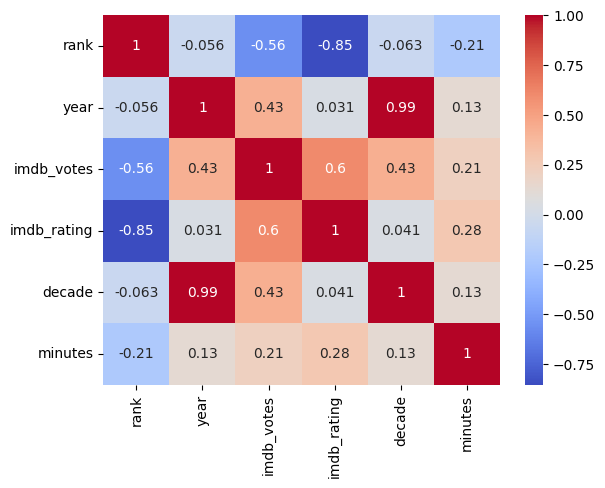

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Insight:- There is a **moderate positive correlation** **(0.6)** between the IMDB rating and the number of IMDB votes. This means that as the number of votes increases, the IMDB rating increase as well

#### 2. Genre with Movie count

In [20]:
genre_counts = df.groupby('main_genre')['title'].count().sort_values(ascending=False)  #groupping the genre and counting the movie title
genre_counts

main_genre
Drama        68
Action       45
Crime        35
Animation    23
Biography    23
Comedy       23
Adventure    22
Horror        4
Mystery       4
Western       2
Film-Noir     1
Name: title, dtype: int64

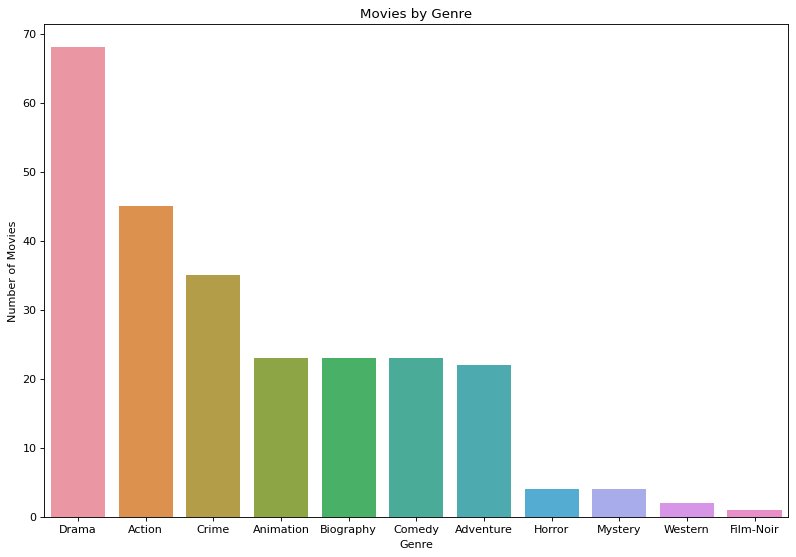

In [21]:
plt.figure(figsize=(12,8),dpi=80)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

Insight:-
The **drama** genre is the most popular with **(68)** movies which are in TOP 250 IMDB Movies


#### 3. Genre with average imdb rating

In [22]:
genre_ratings = df.groupby('main_genre')['imdb_rating'].mean().sort_values(ascending=False) #groupping the genre and taking the average of the imbd_rating
genre_ratings

main_genre
Crime        8.400000
Action       8.366667
Mystery      8.350000
Western      8.350000
Horror       8.325000
Drama        8.295588
Biography    8.265217
Animation    8.252174
Comedy       8.252174
Adventure    8.222727
Film-Noir    8.100000
Name: imdb_rating, dtype: float64

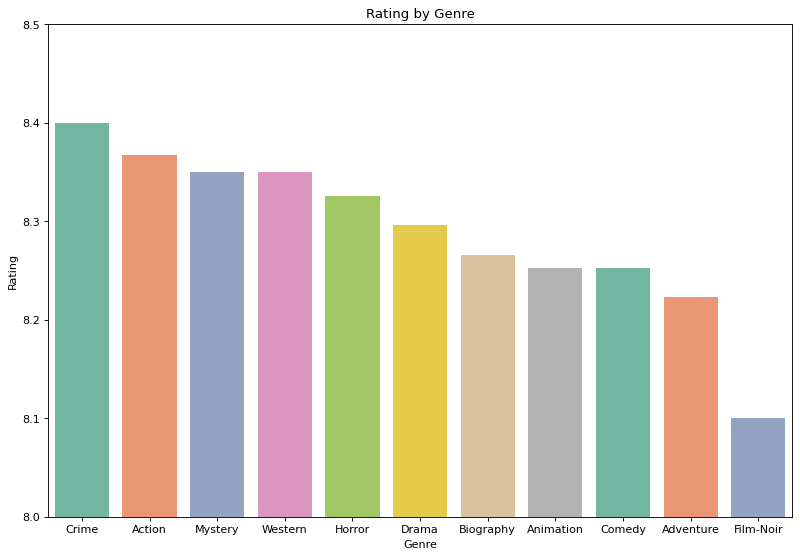

In [23]:
plt.figure(figsize=(12,8),dpi=80)
sns.barplot(x=genre_ratings.index, y=genre_ratings.values,order = genre_ratings.index, palette='Set2')
plt.ylim(8, 8.5)
plt.title('Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

Insight:-
The **Crime** Genre has the highest imbd rating **(8.4)** in TOP 250 IMDB Movies

#### 4. Genre with imbd votes

In [24]:
genre_votes = df.groupby('main_genre')['imdb_votes'].sum().sort_values(ascending=False) # groupping the genre and summing the imbd votes

genre_percentage = (genre_votes / genre_votes.sum()) * 100                              # Calculating the percentage of imbd votes for each genre
genre_percentage

main_genre
Action       26.640471
Drama        22.496876
Crime        15.924263
Animation     9.010675
Biography     8.488496
Adventure     7.484295
Comedy        5.829100
Mystery       2.157261
Horror        1.494464
Western       0.366810
Film-Noir     0.107289
Name: imdb_votes, dtype: float64

(0.0, 30.0)

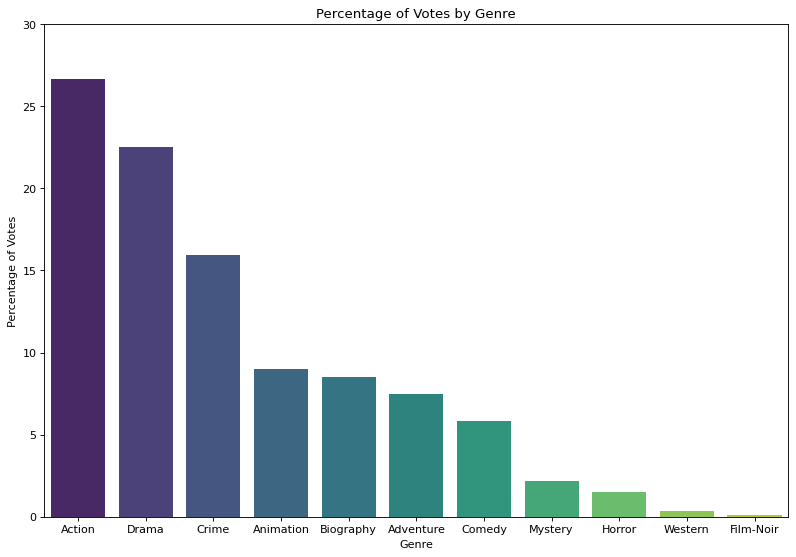

In [25]:
plt.figure(figsize=(12,8),dpi=80)
sns.barplot( x=genre_percentage.index, y=genre_percentage.values,palette='viridis')
plt.title('Percentage of Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage of Votes')
plt.ylim(0, 30)

Insight:-
The **Action** genre has the highest percentage of Votes (**26.64% i.e 43142872**) which are in TOP 250 IMDB Movies

#### 5. TOP Directors by Average rating 

In [26]:
top_directors = df.groupby('director_name').filter(lambda x: len(x) >3)     #filtering the directors with movies more than 3
top_directors

,rank,title,year,imdb_votes,imdb_rating,certificate,duration,genre,director_name,main_genre,decade,minutes
2,3,The Dark Knight,2008,2684051,9.0,PG-13,2h 32m,"Action,Crime,Drama",Christopher Nolan,Action,2000,152
5,6,Schindler's List,1993,1369626,9.0,R,3h 15m,"Biography,Drama,History",Steven Spielberg,Biography,1990,195
7,8,Pulp Fiction,1994,2081489,8.9,R,2h 34m,"Crime,Drama",Quentin Tarantino,Crime,1990,154
9,10,"The Good, the Bad and the Ugly",1966,769389,8.8,Approved,2h 58m,"Adventure,Western",Sergio Leone,Adventure,1960,178
13,14,Inception,2010,2381879,8.8,PG-13,2h 28m,"Action,Adventure,Sci-Fi",Christopher Nolan,Action,2010,148
...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,The Gold Rush,1925,112833,8.1,Passed,1h 35m,"Adventure,Comedy,Drama",Charles Chaplin,Adventure,1920,95
189,190,Barry Lyndon,1975,171559,8.1,PG,3h 5m,"Adventure,Drama,War",Stanley Kubrick,Adventure,1970,185
203,204,Jaws,1975,615988,8.1,PG,2h 4m,"Adventure,Thriller",Steven Spielberg,Adventure,1970,124
236,237,Rebecca,1940,139329,8.1,Approved,2h 10m,"Drama,Film-Noir,Mystery",Alfred Hitchcock,Drama,1940,130


In [27]:
top_directors_rating = df.groupby('director_name').filter(lambda x: len(x) > 3).groupby('director_name')['imdb_rating'].mean().sort_values(ascending=False)
top_directors_rating

director_name
Christopher Nolan    8.557143
Sergio Leone         8.450000
Quentin Tarantino    8.420000
Steven Spielberg     8.371429
Charles Chaplin      8.360000
Billy Wilder         8.320000
Alfred Hitchcock     8.316667
Stanley Kubrick      8.314286
Martin Scorsese      8.314286
Hayao Miyazaki       8.300000
Akira Kurosawa       8.300000
Name: imdb_rating, dtype: float64

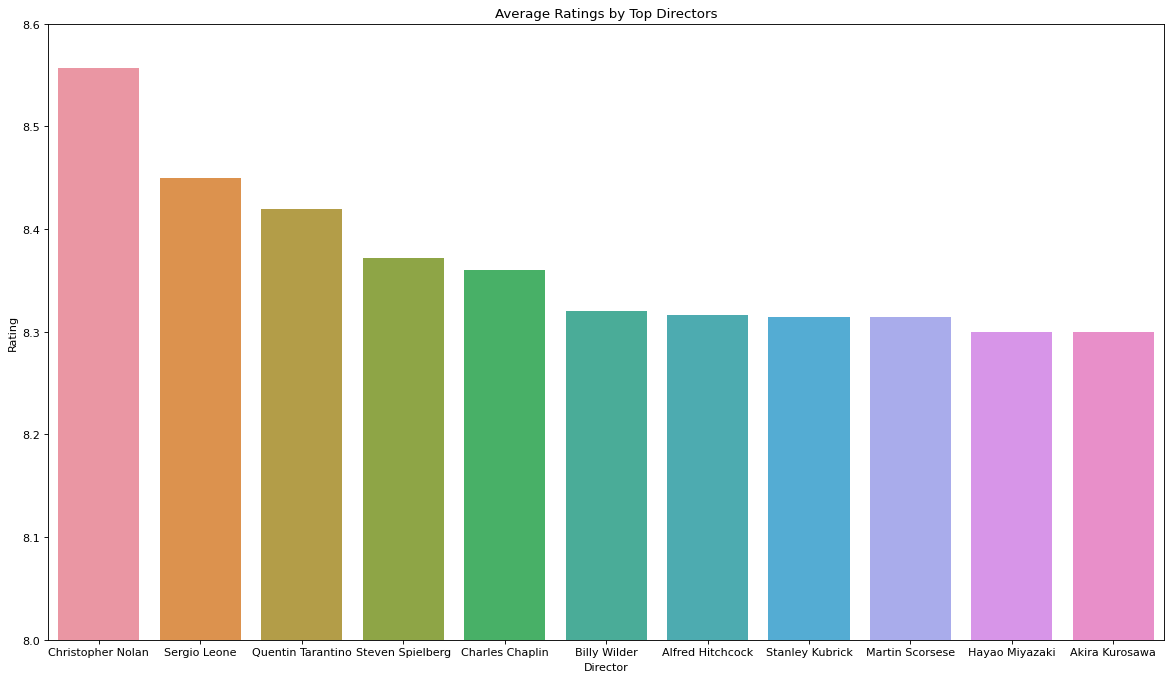

In [28]:
plt.figure(figsize=(18,10),dpi=80)
sns.barplot(x=top_directors_rating.index, y=top_directors_rating.values, order=top_directors_rating.index)
plt.ylim(8, 8.6)
plt.title('Average Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.show()

Insight:- **Christopher Nolan** has the highest Average Rating of **(8.55)** for top 250 IMDB Movies

#### 6 .Relationship between Top Director and Genre with rating

In [29]:
table = pd.pivot_table(top_directors, values='imdb_rating',
                       index='director_name', columns='main_genre',   # create a pivot table of the mean ratings by director and genre
                       aggfunc=np.mean,fill_value=0)
table.head(2)

main_genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,Western
director_name,,,,,,,,,,
Akira Kurosawa,8.333333,8.2,0.0,0.0,0.0,8.3,8.3,0.0,0.0,0.0
Alfred Hitchcock,8.300000,0.0,0.0,0.0,0.0,8.2,8.1,8.5,8.4,0.0


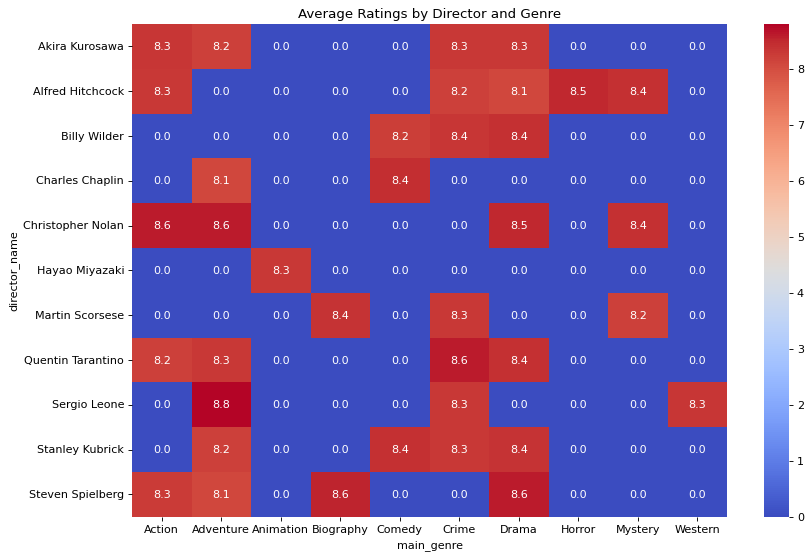

In [30]:
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Ratings by Director and Genre')
plt.show()

Insight:-

1.**Christopher Nolan** has highest average rating in **Action** and **Adventure** Genre

2.**Sergio Leonie** is ideal of **Adventure**

3.**Steven Spielberg** has highest average rating in **Biography** and **Drama**

#### 7. Movies by Decade

In [31]:
top_decades = df.groupby('decade').size().sort_values(ascending=False)   # extracting the count of movies for each decade
top_decades

decade
2000    48
2010    43
1990    42
1980    27
1950    23
1970    19
1960    18
1940    12
1930     7
1920     6
2020     5
dtype: int64

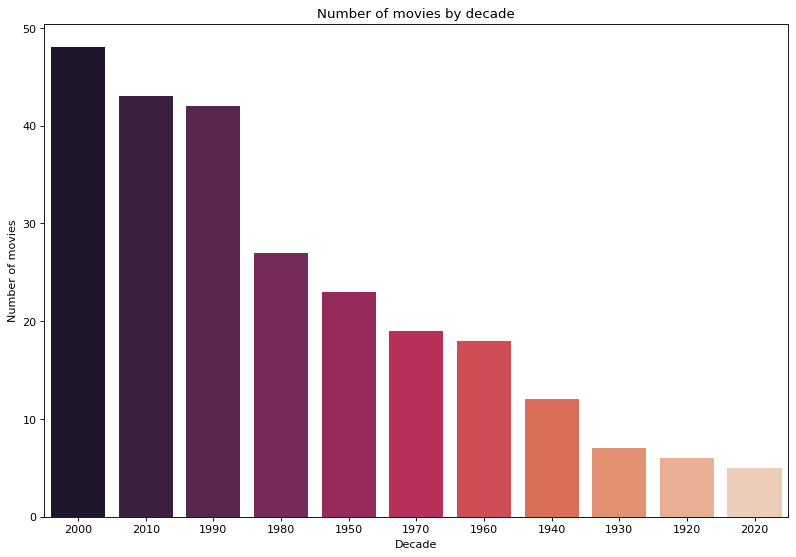

In [32]:
top_decades = df.groupby('decade').size().sort_values(ascending=False)
plt.figure(figsize=(12,8),dpi=80)
sns.barplot(x=top_decades.index, y=top_decades.values,order=top_decades.index,palette='rocket')
plt.xlabel('Decade')
plt.ylabel('Number of movies')
plt.title('Number of movies by decade')
plt.show()

Insight:-

1. **1990,2000,2010** this three decade alone have half of the movies in top 250 IMBD

2. We can see **2020** has the least amount of movies and the possible reason  is that is has **only 3 years** to it in terms of deacade or it is beacuse of  **COVID 19** outbreak and only 5 of the movies made to the IMBD 250 Movies 

#### 8. Average rating by TOP directors and decade

In [33]:
top_directors_decades = top_directors.groupby(['director_name', 'decade'])['imdb_rating'].mean().reset_index()
top_directors_decades.head()

,director_name,decade,imdb_rating
0,Akira Kurosawa,1950,8.366667
1,Akira Kurosawa,1960,8.300000
2,Akira Kurosawa,1970,8.200000
3,Akira Kurosawa,1980,8.200000
4,Alfred Hitchcock,1940,8.100000


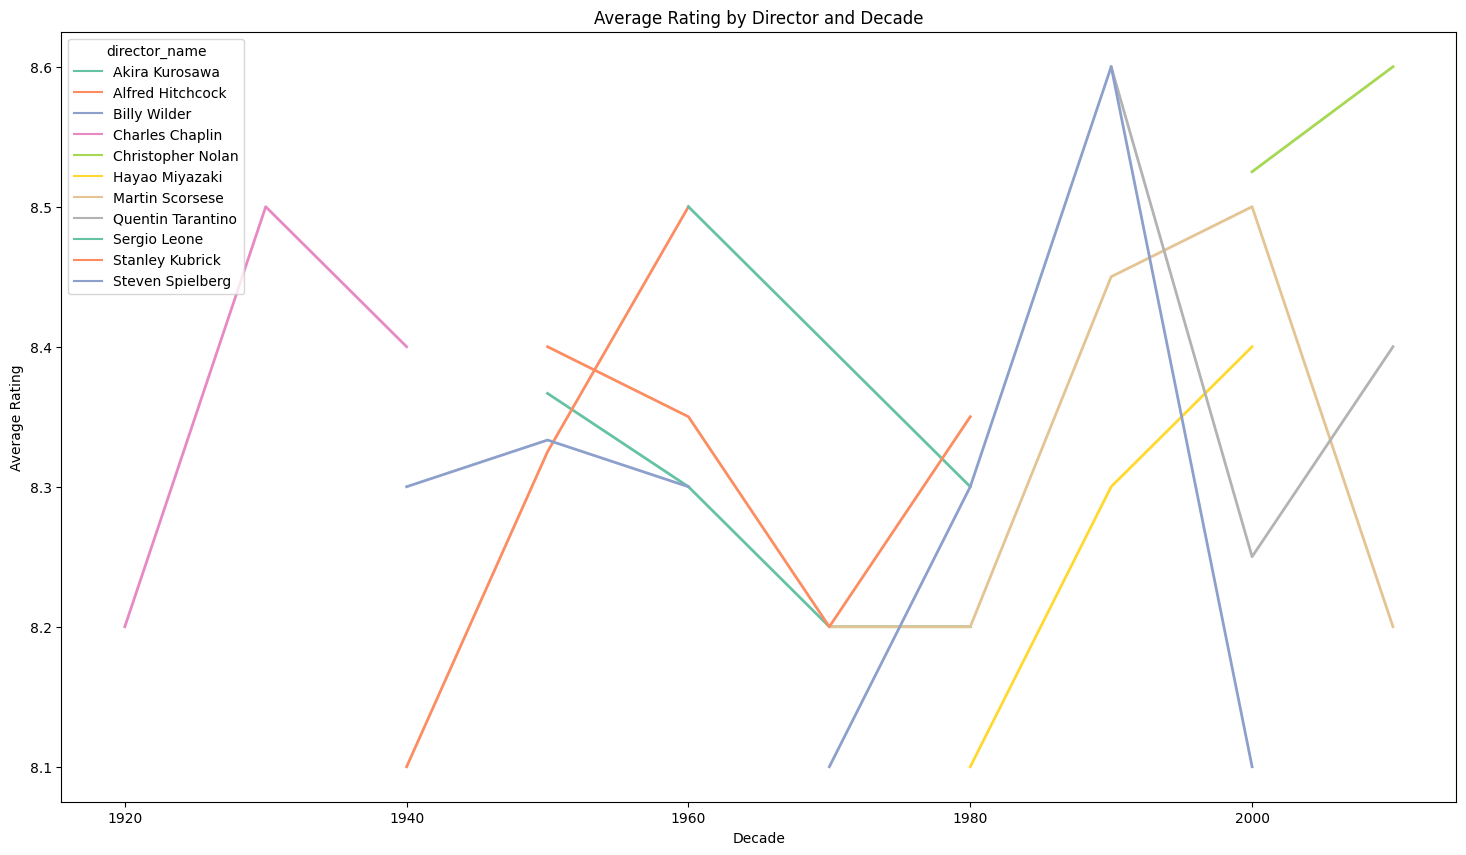

In [34]:
plt.figure(figsize=(18,10))
sns.lineplot(data=top_directors_decades, x='decade', y='imdb_rating', hue='director_name', palette='Set2', linewidth=2)
plt.title('Average Rating by Director and Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.show()

Insight:-

1.Most of the top director's imbd rating has significantly increased throughout the decade 

2.**Martin Scorsese** has been a successfull director and  been consistent over a period of more than **four decades**. It can also be seen that his best work was produced in the **1990s**, while his movies from the **1980s and 2000s** were rated slightly lower on average 